## Overview of Machine Learning

In [ ]:
from dataidea.packages import * # imports np, pd, plt etc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dataidea.datasets import loadDataset

In [ ]:
demo_df = loadDataset('demo')

In [ ]:
cols = {"Age":"age", "Gender":"gender", "Marital Status":"marital_status", "Address":"address",
       "Income":"income","Income Category":"income_category", "Job Category":"job_category",}

demo_df.rename(columns=cols, inplace=True)

In [ ]:
demo_df.columns

Index(['age', 'gender', 'marital_status', 'address', 'income',
       'income_category', 'job_category'],
      dtype='object')

In [ ]:
demo_df.describe() #will only give us numerical values

,age,address,income,income_category,job_category
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,42.475000,11.485000,76.305000,2.520000,1.950000
std,12.801122,10.365665,107.554647,1.065493,0.781379
min,19.000000,0.000000,11.000000,1.000000,1.000000
25%,32.000000,3.000000,27.000000,2.000000,1.000000
50%,43.000000,9.000000,44.500000,2.000000,2.000000
75%,51.000000,17.000000,76.000000,4.000000,3.000000
max,76.000000,51.000000,873.000000,4.000000,3.000000


In [ ]:
demo_df.select_dtypes(include=["object"])

,gender,marital_status
0,f,1
1,m,0
2,f,no answer
3,m,1
4,m,no answer
...,...,...
195,f,0
196,f,1
197,f,1
198,m,0


In [ ]:
demo_df.select_dtypes(include=["object"]).describe()

,gender,marital_status
count,200,200
unique,4,3
top,f,0
freq,99,102


In [ ]:
demo_df["gender"].value_counts().index

Index(['f', 'm', '  f', '   m'], dtype='object', name='gender')

In [ ]:
demo_df.gender.unique()

array(['f', 'm', '  f', '   m'], dtype=object)

In [ ]:
demo_df2 = demo_df.replace(to_replace="  f", value="f")

In [ ]:
demo_df2.gender.unique()

array(['f', 'm', '   m'], dtype=object)

In [ ]:
gender_col = demo_df2.gender.replace(to_replace="   m", value="m")
gender_col

0      f
1      m
2      f
3      m
4      m
      ..
195    f
196    f
197    f
198    m
199    m
Name: gender, Length: 200, dtype: object

In [ ]:
gender_col.unique()

array(['f', 'm'], dtype=object)

In [ ]:
demo_df2["gender"] = gender_col

In [ ]:
demo_df2.gender.unique()

array(['f', 'm'], dtype=object)

In [ ]:
demo_df2.marital_status.unique()

array(['1', '0', 'no answer'], dtype=object)

In [ ]:
demo_df2.marital_status.value_counts()

marital_status
0            102
1             93
no answer      5
Name: count, dtype: int64

In [ ]:
demo_df2.select_dtypes(include=["number"]) #"float64","int64"

,age,address,income,income_category,job_category
0,55,12,72.0,3.0,3
1,56,29,153.0,4.0,3
2,28,9,28.0,2.0,1
3,24,4,26.0,2.0,1
4,25,2,23.0,1.0,2
...,...,...,...,...,...
195,45,3,86.0,4.0,3
196,23,2,27.0,2.0,1
197,66,32,11.0,1.0,2
198,49,4,30.0,2.0,1


In [ ]:
demo_df2.isna().sum()

age                0
gender             0
marital_status     0
address            0
income             0
income_category    0
job_category       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D>,
  <matplotlib.lines.Line2D>],
 'caps': [<matplotlib.lines.Line2D>,
  <matplotlib.lines.Line2D>],
 'boxes': [<matplotlib.lines.Line2D>],
 'medians': [<matplotlib.lines.Line2D>],
 'fliers': [<matplotlib.lines.Line2D>],
 'means': []}

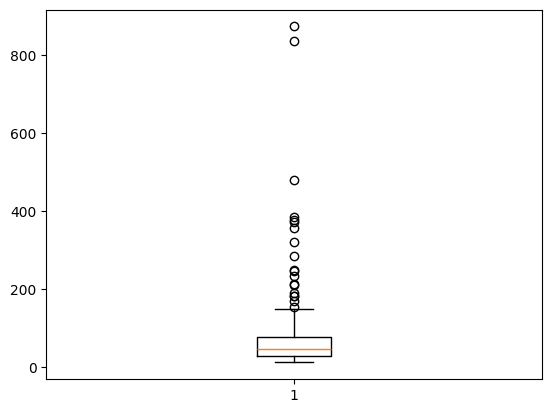

In [ ]:
plt.boxplot(demo_df2["income"])

In [ ]:
#exercise: function to calucate outliers:
#lower fence = Q1 - 1.5(Q3-Q1)
#upper fence = Q3 + 1.5(Q3-Q1)

In [ ]:
def getOutliers(column):

    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    interquantile_range = q3-q1
    lower_fence = q1 - 1.5*interquantile_range
    upper_fence = q3 + 1.5*interquantile_range

    outlier_indicies = np.where((column < lower_fence) | (column > upper_fence))[0]
    outliers = np.array(column[outlier_indicies])
    return outliers, outlier_indicies
    

In [ ]:
outliers, indexes = getOutliers(demo_df2.income)

In [ ]:
demo_df3 = demo_df2.drop(indexes)

(array([ 7., 12., 11., 17., 11., 10., 10., 17., 14., 18., 14., 17., 14.,
         6.,  7.,  6.,  5.,  2.,  1.,  1.]),
 array([19.  , 21.85, 24.7 , 27.55, 30.4 , 33.25, 36.1 , 38.95, 41.8 ,
        44.65, 47.5 , 50.35, 53.2 , 56.05, 58.9 , 61.75, 64.6 , 67.45,
        70.3 , 73.15, 76.  ]),
 <BarContainer object of 20 artists>)

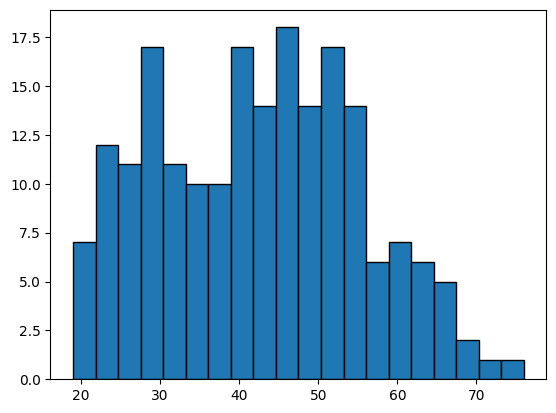

In [ ]:
plt.hist(demo_df2.age, bins = 20, edgecolor = "black")

(array([11., 24., 37., 12., 18., 18.,  8.,  9.,  9.,  9.,  6.,  2.,  2.,
         2.,  4.,  2.,  0.,  1.,  2.,  5.]),
 array([ 11.  ,  17.85,  24.7 ,  31.55,  38.4 ,  45.25,  52.1 ,  58.95,
         65.8 ,  72.65,  79.5 ,  86.35,  93.2 , 100.05, 106.9 , 113.75,
        120.6 , 127.45, 134.3 , 141.15, 148.  ]),
 <BarContainer object of 20 artists>)

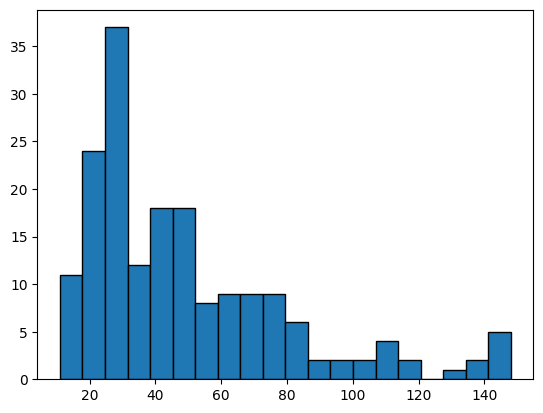

In [ ]:
plt.hist(demo_df3.income, bins=20, edgecolor="black")

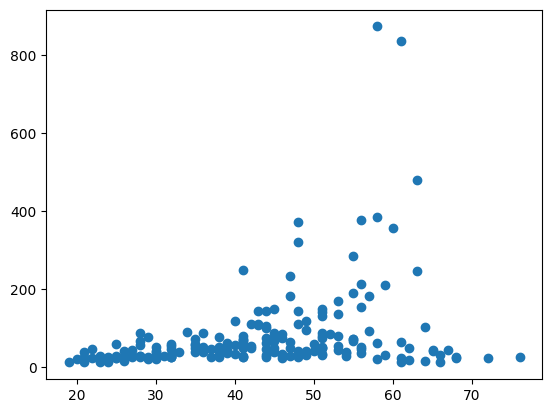

In [ ]:
plt.scatter(demo_df2.age, demo_df2.income)
plt.show()

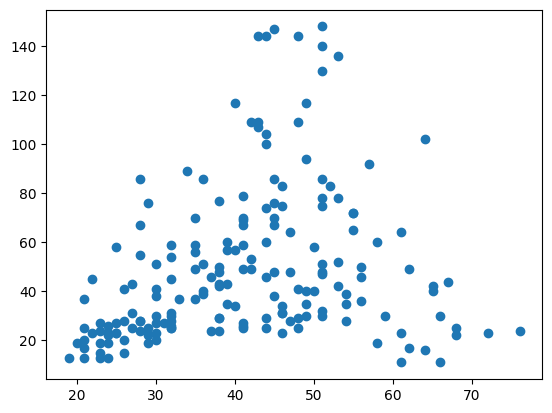

In [ ]:
plt.scatter(demo_df3.age, demo_df3.income)
plt.show()

In [ ]:
demo_df2 = demo_df2[demo_df.income<600]

In [ ]:
demo_df2.isna().sum()

age                0
gender             0
marital_status     0
address            0
income             0
income_category    0
job_category       0
dtype: int64

In [ ]:
demo_df2.head()

,age,gender,marital_status,address,income,income_category,job_category
0,55,f,1,12,72.0,3.0,3
1,56,m,0,29,153.0,4.0,3
2,28,f,no answer,9,28.0,2.0,1
3,24,m,1,4,26.0,2.0,1
4,25,m,no answer,2,23.0,1.0,2


In [ ]:
demo_df4 = demo_df2[demo_df2.marital_status != 'no answer'].copy()

In [ ]:
demo_df4.to_csv('../assets/demo_cleaned.csv', index=False)

In [ ]:
demo_df4.sample(n=5)

,age,gender,marital_status,address,income,income_category,job_category
119,53,f,0,34,136.0,4.0,3
6,44,m,1,17,144.0,4.0,3
80,38,m,0,7,42.0,2.0,1
76,19,f,1,0,13.0,1.0,1
59,28,m,0,9,28.0,2.0,2


In [ ]:
demo_df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              193 non-null    int64  
 1   gender           193 non-null    object 
 2   marital_status   193 non-null    object 
 3   address          193 non-null    int64  
 4   income           193 non-null    float64
 5   income_category  193 non-null    float64
 6   job_category     193 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 12.1+ KB


In [ ]:
demo_df4['marital_status'] = demo_df4.marital_status.astype('int')

In [ ]:
demo_df5 = demo_df4.copy()

In [ ]:
demo_df5 = pd.get_dummies(data=demo_df5, 
                          columns=['gender'], 
                          drop_first=True, 
                          dtype='int'
                         )

In [ ]:
demo_df5.sample(n=5)

,age,marital_status,address,income,income_category,job_category,gender_m
51,48,0,22,109.0,4.0,2,1
183,38,1,18,77.0,4.0,3,0
85,30,0,4,23.0,1.0,1,0
17,21,0,1,37.0,2.0,1,1
156,43,1,5,144.0,4.0,3,1


In [ ]:
logistic_regression_model = LogisticRegression()

In [ ]:
X = demo_df5.drop('marital_status', axis=1)
y = demo_df5.marital_status

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
logistic_regression_model.fit(X, y)

LogisticRegression()

In [ ]:
logistic_regression_model.score(X, y) * 100

54.40414507772021

In [ ]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_regression_model.score(X_test, y_test)

0.42857142857142855

In [ ]:
demo_df2[demo_df2.marital_status == 'no answer']

,age,gender,marital_status,address,income,income_category,job_category
2,28,f,no answer,9,28.0,2.0,1
4,25,m,no answer,2,23.0,1.0,2
7,46,m,no answer,20,75.0,4.0,3
8,41,m,no answer,10,26.0,2.0,2
9,29,f,no answer,4,19.0,1.0,2


In [ ]:
logistic_regression_model.predict([[28, 9, 28, 2, 1, 0]])

/home/jumashafara/venvs/programming_for_data_science/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
predictions = logistic_regression_model.predict(X_test)

In [ ]:
# X_test['predicted_marial_status'] = predictions

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

In [ ]:
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree_classifier.score(X_test, y_test)

0.4897959183673469

In [ ]:
decision_tree_classifier.predict(X=[[28, 9, 28, 2, 1, 0]])

/home/jumashafara/venvs/programming_for_data_science/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
decision_tree_classifier.predict(X=X_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1])

In [ ]:
# take in X_test, y_test
# predictions on X_test
# true values ie y_test
# match which are correct
# correct/total